<a href="https://colab.research.google.com/github/AhmedKhaleda998/Egyptian-Currency-Recognition/blob/main/Banknotes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import cv2 as cv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Banknotes/data.csv')
df['values'] = df['values'].astype(str)
df

,file_names,values
0,1.jpg,100.0
1,2.jpg,100.0
2,3.jpg,100.0
3,4.jpg,100.0
4,5.jpg,100.0
...,...,...
131,132.jpg,200.0
132,133.jpg,200.0
133,134.jpg,10.0
134,135.jpg,10.0


In [ ]:
df = df.sample(frac=1, random_state=43).reset_index(drop=True)
df

,file_names,values
0,42.jpg,50.0
1,109.jpg,20.0
2,110.jpg,20.0
3,29.jpg,20.0
4,127.jpg,20.0
...,...,...
131,24.jpg,50.0
132,47.jpg,20.0
133,27.jpg,50.0
134,13.jpg,10.0


In [ ]:
threshold = int(len(df) * 0.9)
train_df = df.iloc[:threshold]
test_df = df.iloc[threshold:]
test_df

,file_names,values
122,33.jpg,10.0
123,21.jpg,100.0
124,131.jpg,100.0
125,105.jpg,50.0
126,41.jpg,200.0
127,75.jpg,10.0
128,35.jpg,10.0
129,87.jpg,0.5
130,77.jpg,1.0
131,24.jpg,50.0


In [ ]:
images = []
for file_name in train_df['file_names']:
  img = cv.imread(f'/content/drive/MyDrive/Banknotes/{file_name}')
  img = cv.resize(img, (512, 256))
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  images.append(img)

X_train = np.array(images).reshape(threshold, -1)
y_train = train_df['values']

In [ ]:
images = []
for file_name in test_df['file_names']:
  img = cv.imread(f'/content/drive/MyDrive/Banknotes/{file_name}')
  img = cv.resize(img, (512, 256))
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  images.append(img)

X_test = np.array(images).reshape(len(df) - threshold, -1)
y_test = test_df['values']

In [ ]:
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predictions = rnd_clf.predict(X_test)

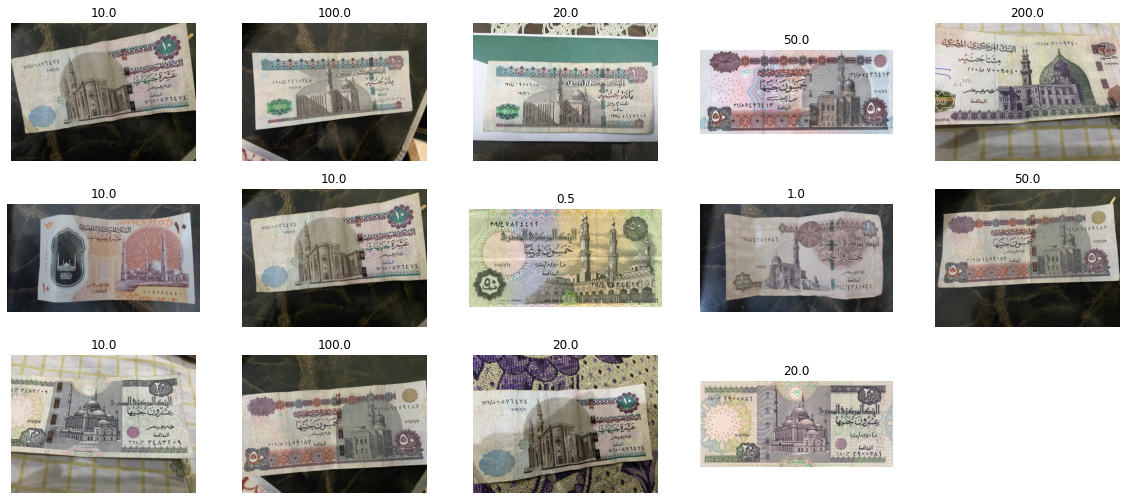

In [ ]:
fig = plt.figure(figsize=(20, 30))
i=1
for file_name in test_df['file_names']:
  img = cv.imread(f'/content/drive/MyDrive/Banknotes/{file_name}')
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  fig.add_subplot(10, 5, i)
  plt.imshow(img)
  plt.title(predictions[i-1])
  plt.axis('off')
  i = i+1

(-0.5, 1023.5, 478.5, -0.5)

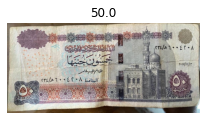

In [ ]:
image = []
img = cv.imread(f'/content/139.jpg')
img = cv.resize(img, (512, 256))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
image.append(img)

test = np.array(image).reshape(1, -1)
pred = rnd_clf.predict(test)
fig = plt.figure(figsize=(20, 30))
img = cv.imread(f'/content/139.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig.add_subplot(10, 5, 5)
plt.imshow(img)
plt.title(pred[0])
plt.axis('off')

# New section